In [1]:
import azureml.dataprep as dprep
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
clicks_df = pd.read_csv("../clicks_raw.csv")

In [3]:
clicks_df.head()

,Client ID,Session ID,Page,Hour of Day,Minute,Users,reg_no,make,model,fuel,colour,body,trasmission
0,1.000010e+09,1552164105110.tu20xgmk,/search/bmw/1-series/manual-diesel-white-hatch...,2019030920,41,1,vk65kzw,bmw,1-series,diesel,white,hatchback,manual
1,1.000020e+09,1551548659573.la303ik,/search/alfa-romeo/giulietta/manual-diesel-bla...,2019030217,43,1,st63cxf,alfa-romeo,giulietta,diesel,black,hatchback,manual
2,1.000020e+09,1551548659573.la303ik,/search/alfa-romeo/giulietta/manual-diesel-bla...,2019030217,44,1,st63cxf,alfa-romeo,giulietta,diesel,black,hatchback,manual
3,1.000024e+08,1553512749300.yqecw34,/search/mini/countryman/automatic-diesel-silve...,2019032511,19,1,wr14uju,mini,countryman,diesel,silver,hatchback,automatic
4,1.000026e+09,1551459467897.sc8ayc9g,/search/renault/megane/manual-diesel-orange-co...,2019030116,57,1,hn09guj,renault,megane,diesel,orange,coupe,manual


In [4]:
len(clicks_df) #Total Clicks

999999

In [5]:
clicks_df.isna().sum() #All Null Values

Client ID           0
Session ID          0
Page                0
Hour of Day         0
Minute              0
Users               0
reg_no         285687
make           265476
model          265139
fuel           285687
colour         285687
body           285687
trasmission    285350
dtype: int64

In [6]:
clicks_df = clicks_df.dropna()

In [7]:
clicks_df.isna().sum() #All Null Values

Client ID      0
Session ID     0
Page           0
Hour of Day    0
Minute         0
Users          0
reg_no         0
make           0
model          0
fuel           0
colour         0
body           0
trasmission    0
dtype: int64

In [8]:
print(len(clicks_df)) #After removing null values

714312


In [9]:
clicks_df["reg_no"].nunique() #Unique Cars Seen

8222

In [10]:
clicks_df["Session ID"].nunique() #Unique Sessions

216583

In [11]:
clicks_df["Client ID"].nunique() #Unique Users

112462

In [12]:
grouped = clicks_df.groupby('Session ID')['Page'].agg(["count"])
print(grouped.head())

                         count
Session ID                    
1549021232635.0ek1mrkt       4
1551110299524.p1wxhlm8       4
1551398428155.0rj029         1
1551398441283.yszvuzqp       2
1551398443954.0ff7clwtt      1


In [13]:
filtered = grouped.query('count>1')

x = len(filtered)

print(f" Sessions with greater than 1 click and less than 30 clicks = {x}")
print(f" Sessions with only 1 click or more than 30 = {len(grouped)-x}")

 Sessions with greater than 1 click and less than 30 clicks = 129938
 Sessions with only 1 click or more than 30 = 86645


In [14]:
total_clicks = filtered['count'].sum()
print(f" Total clicks after filtering = {total_clicks}")

 Total clicks after filtering = 627667


In [15]:
average_clicks = filtered['count'].mean()
print(f" Average clicks per session = {average_clicks}")

 Average clicks per session = 4.83051147470332


In [16]:
max_clicks = filtered['count'].max()
min_clicks = filtered['count'].min()
print(f"Max clicks per session = {max_clicks}")
print(f"Min clicks per session = {min_clicks}")

Max clicks per session = 232
Min clicks per session = 2


In [17]:
filtered.sort_values(by='count', ascending=False).head()

,count
Session ID,
1552950052387.y70a9a5,232
1551914799441.oq43r0m7,202
1551789685802.f07vfebdm,177
1551807718653.vsinu0qn,167
1553385024494.trro5t6u,140


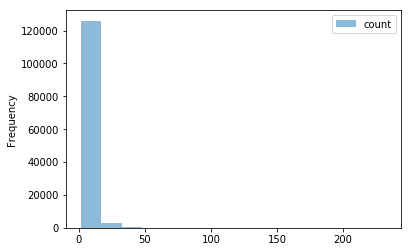

In [18]:
filtered.plot.hist(bins=15, alpha=0.5) #Clicks per session frequency

In [19]:
clean_df = pd.merge(clicks_df, filtered, on='Session ID')
clean_df.head()

,Client ID,Session ID,Page,Hour of Day,Minute,Users,reg_no,make,model,fuel,colour,body,trasmission,count
0,1.000020e+09,1551548659573.la303ik,/search/alfa-romeo/giulietta/manual-diesel-bla...,2019030217,43,1,st63cxf,alfa-romeo,giulietta,diesel,black,hatchback,manual,2
1,1.000020e+09,1551548659573.la303ik,/search/alfa-romeo/giulietta/manual-diesel-bla...,2019030217,44,1,st63cxf,alfa-romeo,giulietta,diesel,black,hatchback,manual,2
2,1.000026e+08,1553267404527.4nell1ve,/search/ford/focus/manual-petrol-white-hatchba...,2019032215,10,1,bt62axz,ford,focus,petrol,white,hatchback,manual,2
3,1.000026e+08,1553267404527.4nell1ve,/search/vauxhall/astra/manual-diesel-silver-ha...,2019032215,7,1,fn65pka,vauxhall,astra,diesel,silver,hatchback,manual,2
4,1.000059e+09,1551464297765.jsxg0dp8,/search/bmw/4-series/manual-diesel-grey-hatchb...,2019030118,17,1,fv17vfy,bmw,4-series,diesel,grey,hatchback,manual,2


In [20]:
clean_df.drop('count', axis=1, inplace=True)
print(len(clean_df))

627667


In [21]:
clean_df.to_csv("../clicks_clean.csv", index=False) #Save the cleaned data